In [3]:
import requests
import bs4

In [4]:
fmt = 'http://shastaavalanche.org/archive?date_filter[min]=&date_filter[max]=&page={page}'

In [11]:
def get_page(page=0):
    url = fmt.format(page=page)
    r = requests.get(url)

    soup = bs4.BeautifulSoup(r.text)
    tables = soup.findAll('table')
    
    try:
        table = tables[0]
    except IndexError:
        raise Exception('no tables in page')

    rows = table.findAll('tr')
    rows = rows[1:]  # Skip the header row
    
    return rows

In [8]:
def process_row(row):
    cells = row.findAll('td')

    advisory = cells[0].find('a').attrs['href']
    icon = cells[0].find('img').attrs['src']
    summary = cells[1].find('p').text
    rose = cells[2].find('img').attrs['src']
    
    return advisory, icon, summary, rose

In [13]:
import itertools

In [15]:
# doing this in memory because it's not that big

advisories = []

for i in itertools.count():
    rows = [process_row(row) for row in get_page(i)]
    advisories.extend(rows)

Exception: no tables in page

In [17]:
len(advisories)

210

In [18]:
import pickle

In [24]:
with open('shasta.pickle', 'w') as f:
    pickle.dump(advisories, f)

# put it in pandas

In [29]:
with open('shasta.pickle', 'r') as f:
    advisories = pickle.load(f)

In [31]:
import pandas

In [32]:
df = pandas.DataFrame(advisories, columns=('advisory', 'icon', 'summary', 'rose'))
df

,advisory,icon,summary,rose
0,/advisory/avalanche-advisory-2016-01-21-070134,/sites/all/themes/sac/img/rating-icons/2.png,LOW avalanche danger exists near and below tre...,/sites/default/files/forecast/201601/20160121-...
1,/advisory/avalanche-advisory-2016-01-20-070611,/sites/all/themes/sac/img/rating-icons/2.png,"Below treeline, the avalanche danger is LOW, a...",/sites/default/files/forecast/201601/20160120-...
2,/advisory/avalanche-advisory-2016-01-19-064703,/sites/all/themes/sac/img/rating-icons/2.png,"Below and near treeline, the avalanche danger ...",/sites/default/files/forecast/201601/20160119-...
3,/advisory/avalanche-advisory-2016-01-18-070719,/sites/all/themes/sac/img/rating-icons/3.png,The avalanche danger will rise as one gains el...,/sites/default/files/forecast/201601/20160118-...
4,/advisory/avalanche-advisory-2016-01-17-070337,/sites/all/themes/sac/img/rating-icons/3.png,CONSIDERABLE avalanche danger exists on all as...,/sites/default/files/forecast/201601/20160117-...
5,/advisory/avalanche-advisory-2016-01-16-070857,/sites/all/themes/sac/img/rating-icons/3.png,CONSIDERABLE avalanche danger exists on all as...,/sites/default/files/forecast/201601/20160116-...
6,/advisory/avalanche-advisory-2016-01-15-070706,/sites/all/themes/sac/img/rating-icons/3.png,CONSIDERABLE avalanche danger exists on all as...,/sites/default/files/forecast/201601/20160115-...
7,/advisory/avalanche-advisory-2016-01-14-065820,/sites/all/themes/sac/img/rating-icons/2.png,MODERATE avalanche danger exists for all eleva...,/sites/default/files/forecast/201601/20160114-...
8,/advisory/avalanche-advisory-2016-01-13-070413,/sites/all/themes/sac/img/rating-icons/2.png,MODERATE avalanche danger exists for all eleva...,/sites/default/files/forecast/201601/20160113-...
9,/advisory/avalanche-advisory-2016-01-12-065132,/sites/all/themes/sac/img/rating-icons/1.png,LOW avalanche danger exists for all elevations...,/sites/default/files/forecast/201601/20160112-...


In [33]:
dates = df.advisory.str.extract('(\d{4}-\d{2}-\d{2}-\d{6})')
dates = pandas.to_datetime(dates)
dates.name = 'issued'
df = df.set_index(dates)

Extract the danger rating on a scale of 1 to 5. 0 means no data

In [46]:
df['danger'] = pandas.to_numeric(df.icon.str.extract('(\d).png'))

In [36]:
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


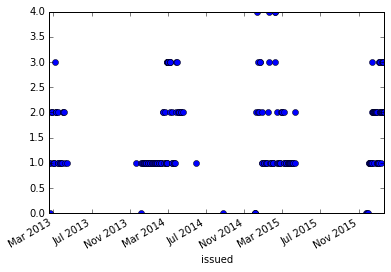

In [50]:
df.danger.plot(style='o')